In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image with the gray scale format

In [2]:
src = cv2.imread('build.jpg',cv2.IMREAD_GRAYSCALE)
src =cv2.resize(src,(512,768))

In [3]:
src.shape

(768, 512)

# Ploting the values of pixels
- The image is represented by a matrix
- The values range is between 0 and 255

In [4]:
src

array([[129, 125, 130, ...,  74,  66,  60],
       [126, 126, 130, ...,  70,  69,  59],
       [100, 119, 127, ...,  66,  61,  60],
       ...,
       [148, 157, 162, ..., 131, 137, 128],
       [171, 158, 154, ..., 125, 122, 128],
       [153, 154, 164, ..., 129, 128, 132]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

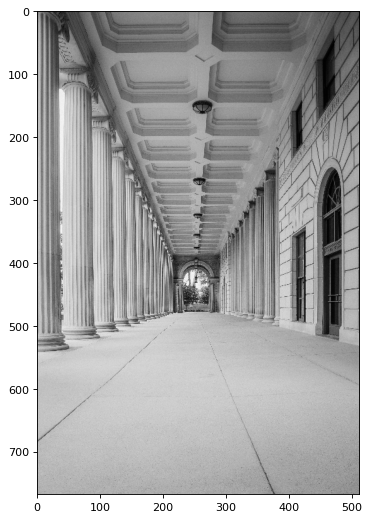

In [5]:
#Photo by Amber Kipp on Unsplash
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(src,cmap='gray')
plt.show

In [6]:
#image resolution
src.shape

(768, 512)

# Vertical lines filter
- the transpose matix gives us the horizontal lines filter

In [7]:
filt = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
filt

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

# Initialize the new image dimensions

In [8]:
newimg = np.full((src.shape[0]-filt.shape[0]+1, src.shape[1]-filt.shape[1]+1), 0)
newimg.shape

(766, 510)

# Convolution Algorithm
- stride is equal to (1,1)
- padding is not applied

In [9]:
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        cpt = 0
        for k in range(filt.shape[0]):
            for k2 in range(filt.shape[1]):
                cpt = cpt+ (filt[k,k2]* src[i+k,j+k2])
        newimg[i,j] = cpt

# Apply relu function to the output image
to get rid of negative values

In [10]:
newimg[newimg<0] = 0

# Ploting the new image

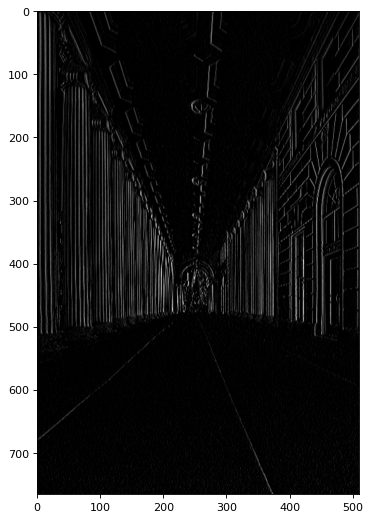

In [11]:
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(newimg,cmap='gray')

# Horizontal lines filter


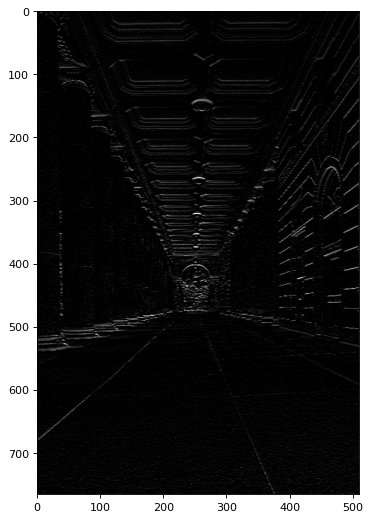

In [12]:
filt = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
filt = filt.T
filt

for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        cpt = 0
        for k in range(filt.shape[0]):
            for k2 in range(filt.shape[1]):
                cpt = cpt+ (filt[k,k2]* src[i+k,j+k2])
        newimg[i,j] = cpt
        
newimg[newimg<0] = 0

plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(newimg,cmap='gray')

## TODO

##### 2)  apply the horizontal  filter using stride = (2,2) and stride = (3,3)

- stride = (2,2)

In [13]:
newimg = np.full((int((src.shape[0]-filt.shape[0])/2)+1, int((src.shape[1]-filt.shape[1])/2)+1), 0)
newimg.shape

(383, 255)

In [14]:
for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        cpt = 0
        for k in range(filt.shape[0]):
            for k2 in range(filt.shape[1]):
                cpt = cpt+ (filt[k,k2]* src[i*2+k,j*2+k2])
        newimg[i,j] = cpt

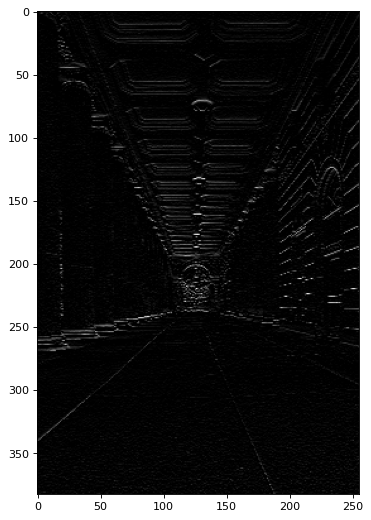

In [15]:
newimg[newimg<0] = 0
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(newimg,cmap='gray')

- stride = (3,3)

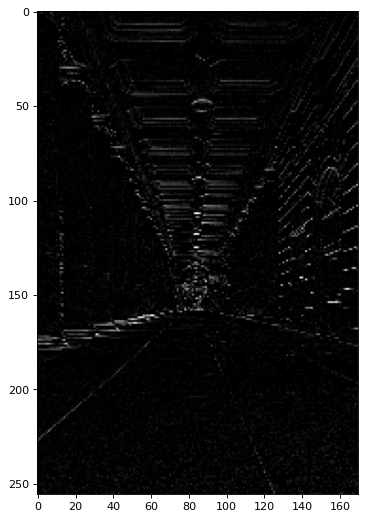

In [16]:
newimg = np.full((int((src.shape[0]-filt.shape[0])/3)+1, int((src.shape[1]-filt.shape[1])/3)+1), 0)

for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        cpt = 0
        for k in range(filt.shape[0]):
            for k2 in range(filt.shape[1]):
                cpt = cpt+ (filt[k,k2]* src[i*3+k,j*3+k2])
        newimg[i,j] = cpt
        
newimg[newimg<0] = 0
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(newimg,cmap='gray')

##### 2) Add padding to the original image and then apply the horizontal filter with srtide= (1,1)

In [17]:
src_withpad = np.pad(src,3,'constant', constant_values=(0))

In [18]:
src_withpad

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

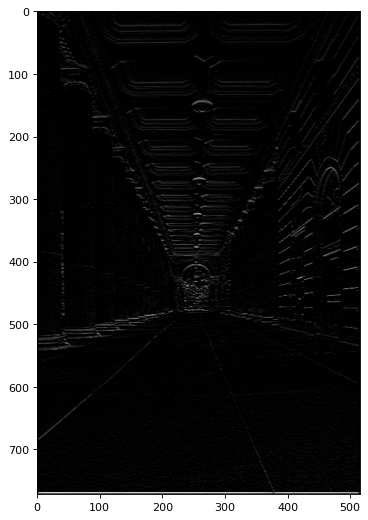

In [19]:
newimg = np.full((src_withpad.shape[0]-filt.shape[0]+1, src_withpad.shape[1]-filt.shape[1]+1), 0)

for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        cpt = 0
        for k in range(filt.shape[0]):
            for k2 in range(filt.shape[1]):
                cpt = cpt+ (filt[k,k2]* src_withpad[i+k,j+k2])
        newimg[i,j] = cpt
        
newimg[newimg<0] = 0
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(newimg,cmap='gray')